<a href="https://colab.research.google.com/github/juliethMZ/Numpy-and-Pandas-practices/blob/main/Pandas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas matplotlib

# **CREACION Y MANIPULACION DE COLUMNAS EN PANDAS**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Online_Retail.csv', encoding='latin-1')

df['TotalPrice'] = df['Quantity'] * df['UnitPrice'] #aqui creo una nueva columna 'TotalPrice'
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
#crear columnas basadas en de condicionales con valores de tipo booleano

df['HighValue'] = df['TotalPrice'] > 16 #creando otra columa 'HighValue'
print(df['HighValue'])
df.head(3)

0         False
1          True
2          True
3          True
4          True
          ...  
541904    False
541905    False
541906     True
541907     True
541908    False
Name: HighValue, Length: 541909, dtype: bool


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,HighValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30,False
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00,True


In [ ]:
# función .info() da el resumen rápido sobre un DataFrame.

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   TotalPrice   541909 non-null  float64
 9   HighValue    541909 non-null  bool   
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 37.7+ MB
None


In [ ]:
#vamos a cambiar de objeto a tiempo fecha
df ['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) #aqui transformamos la columa el valor de objeto a fecha
print(df.info())

<ipython-input-15-0780488f0cb8>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df ['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) #aqui transformamos la columa el valor de objeto a fecha


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   TotalPrice   541909 non-null  float64       
 9   HighValue    541909 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.7+ MB
None


In [ ]:
#FUNCION LAMBDA---------------------------------------------------
df['DiscountedPrice'] = df['UnitPrice'].apply(lambda x: x* 0.9)
print(df.head(3))

  InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00   

   HighValue  DiscountedPrice  
0      False            2.295  
1       True            3.051  
2       True            2.475  


In [ ]:
#FUNCION APPLY (podemos transformar con datos categoricos)
def catergorize_price(price):
  if price > 50:
    return 'High'
  elif price < 20:
    return 'Medium'
  else:
    return 'Low'

df['PriceCategory'] = df['UnitPrice'].apply(catergorize_price)

print(df.head(3))

  InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00   

   HighValue  DiscountedPrice PriceCategory  
0      False            2.295        Medium  
1       True            3.051        Medium  
2       True            2.475        Medium  


In [ ]:
#FUNCION GROUPBY
#analisis de ventas de los productos más vendidos en regiones, producto y tiempo

country_count = df['Country'].value_counts()
print(country_count)

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [ ]:
#agrupar por pais para calcular la suma total de cantidad
#esta info podemos averuar media, mediana etc
country_group = df.groupby('Country') ['Quantity'].sum() #cantidad de ventas y de cada pais la suma
print(country_group)

Country
Australia                 83653
Austria                    4827
Bahrain                     260
Belgium                   23152
Brazil                      356
Canada                     2763
Channel Islands            9479
Cyprus                     6317
Czech Republic              592
Denmark                    8188
EIRE                     142637
European Community          497
Finland                   10666
France                   110480
Germany                  117448
Greece                     1556
Hong Kong                  4769
Iceland                    2458
Israel                     4353
Italy                      7999
Japan                     25218
Lebanon                     386
Lithuania                   652
Malta                       944
Netherlands              200128
Norway                    19247
Poland                     3653
Portugal                  16180
RSA                         352
Saudi Arabia                 75
Singapore                  5234


In [ ]:
country_stats = df.groupby('Country')['Quantity'].agg(['mean','sum'])
print(country_stats)

                           mean      sum
Country                                 
Australia             66.444003    83653
Austria               12.037406     4827
Bahrain               13.684211      260
Belgium               11.189947    23152
Brazil                11.125000      356
Canada                18.298013     2763
Channel Islands       12.505277     9479
Cyprus                10.155949     6317
Czech Republic        19.733333      592
Denmark               21.048843     8188
EIRE                  17.403245   142637
European Community     8.147541      497
Finland               15.346763    10666
France                12.911067   110480
Germany               12.369458   117448
Greece                10.657534     1556
Hong Kong             16.559028     4769
Iceland               13.505495     2458
Israel                14.656566     4353
Italy                  9.961395     7999
Japan                 70.441341    25218
Lebanon                8.577778      386
Lithuania       

In [ ]:
#en cada pais tiene un codigo de stock y suma cada producto
country_stock_group = df.groupby(['Country','StockCode'])['Quantity'].sum()
print(country_stock_group)

Country      StockCode
Australia    15036        600
             15056BL        3
             16161P       400
             16169E        25
             20665          6
                         ... 
Unspecified  85180A         2
             85180B         1
             85212         12
             85213         12
             85227         10
Name: Quantity, Length: 19839, dtype: int64


In [ ]:
def total_renevue(group):
  return (group['Quantity'] * group['UnitPrice']).sum()

total_renevue = df.groupby('Country').apply(total_renevue)
print(total_renevue)

Country
Australia                137077.270
Austria                   10154.320
Bahrain                     548.400
Belgium                   40910.960
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20086.290
Cyprus                    12946.290
Czech Republic              707.720
Denmark                   18768.140
EIRE                     263276.820
European Community         1291.750
Finland                   22326.740
France                   197403.900
Germany                  221698.210
Greece                     4710.520
Hong Kong                 10117.040
Iceland                    4310.000
Israel                     7907.820
Italy                     16890.510
Japan                     35340.620
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2505.470
Netherlands              284661.540
Norway                    35163.460
Poland                     7213.140
Portugal            

# **FILTRADO DE DATOS**

In [ ]:
#nombrar mi nuevo DataFrame como 'sales_data'
file_path = '/content/Online_Retail.csv'
sales_data = pd.read_csv(file_path, encoding='latin-1')

#------------------------------------------------------------------------------
#filtrar ventas en Reino Unido - UK
uk_sales = sales_data [sales_data['Country'] == 'United Kingdom']
print(uk_sales)

In [ ]:
#FILTRADO CON OPERADORES
high_quantity_sales = sales_data[(sales_data['Quantity'] > 120)]
print(high_quantity_sales)

      InvoiceNo StockCode                     Description  Quantity  \
178      536387     79321                   CHILLI LIGHTS       192   
179      536387     22780  LIGHT GARLAND BUTTERFILES PINK       192   
180      536387     22779      WOODEN OWLS LIGHT GARLAND        192   
181      536387     22466   FAIRY TALE COTTAGE NIGHTLIGHT       432   
182      536387     21731   RED TOADSTOOL LED NIGHT LIGHT       432   
...         ...       ...                             ...       ...   
77047    542690     70006        LOVE HEART POCKET WARMER       900   
77056    542691     84879   ASSORTED COLOUR BIRD ORNAMENT       160   
77074    542694     15036       ASSORTED COLOURS SILK FAN       600   
77766    542785     16016     LARGE CHINESE STYLE SCISSOR       200   
77829    542789     84879   ASSORTED COLOUR BIRD ORNAMENT       160   

         InvoiceDate  UnitPrice  CustomerID         Country  
178     12/1/10 9:58       3.82     16029.0  United Kingdom  
179     12/1/10 9:58   

In [ ]:
#evaluar ambos filtros con operadores '==' y '>'

uk_high_quantity_sales = sales_data[(sales_data['Country'] == 'United Kingdom') & (sales_data['Quantity'] > 330)]
print(uk_high_quantity_sales)


      InvoiceNo StockCode                     Description  Quantity  \
181      536387     22466   FAIRY TALE COTTAGE NIGHTLIGHT       432   
182      536387     21731   RED TOADSTOOL LED NIGHT LIGHT       432   
730      536437     17021          NAMASTE SWAGAT INCENSE       600   
870      536477     21137        BLACK RECORD COVER FRAME       480   
2364     536584    84029E  RED WOOLLY HOTTIE WHITE HEART.       384   
...         ...       ...                             ...       ...   
71767    542208     17003             BROCADE RING PURSE        720   
74614    542504     37413                             NaN      5568   
74615    542505    79063D                             NaN      2560   
77047    542690     70006        LOVE HEART POCKET WARMER       900   
77074    542694     15036       ASSORTED COLOURS SILK FAN       600   

         InvoiceDate  UnitPrice  CustomerID         Country  
181     12/1/10 9:58       1.45     16029.0  United Kingdom  
182     12/1/10 9:58   

In [ ]:
#series, extraer solo el año
sales_data['InvoiceDate'] = pd.to_datetime(sales_data['InvoiceDate'])
sales_2010 = sales_data[sales_data['InvoiceDate'].dt.year == 2010]
print(sales_2010)

<ipython-input-5-8ed456fcc7dd>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_data['InvoiceDate'] = pd.to_datetime(sales_data['InvoiceDate'])


      InvoiceNo StockCode                          Description  Quantity  \
0        536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1        536365     71053                  WHITE METAL LANTERN         6   
2        536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3        536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4        536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...         ...       ...                                  ...       ...   
42476    539991     21618       4 WILDFLOWER BOTANICAL CANDLES         1   
42477    539991     72741                GRAND CHOCOLATECANDLE         4   
42478    539992     21470        FLOWER VINE RAFFIA FOOD COVER         1   
42479    539992     22258              FELT FARM ANIMAL RABBIT         1   
42480    539992     21155                RED RETROSPOT PEG BAG         1   

              InvoiceDate  UnitPrice  CustomerID         Country  
0     2010-12-01 08:

In [ ]:
#filtro por año y por mes
sales_sep_2010 = sales_data[(sales_data['InvoiceDate'].dt.year == 2010)& (sales_data['InvoiceDate'].dt.month == 9) ]
print(sales_sep_2010)

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


# **PIVOT TABLET**

In [ ]:
#resume y reorganiza datos crudos, estadistica comunes, conteos y promedios
#comparar subgrupos de datos, etc.

pivot_table = pd.pivot_table(sales_data, values = 'Quantity', index ='Country', #country es mi indice
                             columns = 'StockCode', aggfunc='sum') #columnas a evaluar y función'sum'
                             #aggfunc sirve para resumir los datos
print(pivot_table)

#Nan: no ventas en ese pais con ese código

StockCode        10002  10120  10123C  10124A  10124G  10125  10133   10135  \
Country                                                                       
Australia          NaN    NaN     NaN     NaN     NaN    NaN    NaN     NaN   
Austria            NaN    NaN     NaN     NaN     NaN    NaN    NaN     NaN   
Bahrain            NaN    NaN     NaN     NaN     NaN    NaN    NaN     NaN   
Belgium            NaN    NaN     NaN     NaN     NaN    NaN    NaN     NaN   
Channel Islands    NaN    NaN     NaN     NaN     NaN    NaN    NaN     NaN   
Cyprus             NaN    NaN     NaN     NaN     NaN    NaN    NaN     NaN   
Denmark            NaN    NaN     NaN     NaN     NaN    NaN    NaN     NaN   
EIRE              12.0    NaN     NaN     NaN     NaN    NaN    NaN     NaN   
Finland            NaN    NaN     NaN     NaN     NaN    NaN    NaN     NaN   
France           252.0    NaN     NaN     NaN     NaN   20.0    NaN     NaN   
Germany            1.0    NaN     NaN     NaN     Na

In [ ]:
df = pd.DataFrame (
    {'A': [1, 2, 3],
     'B': ['oro', 'mares', 'sangre'],
     'C': ['amarillo', 'azul', 'rojo']}
)
print(df)

   A       B         C
0  1     oro  amarillo
1  2   mares      azul
2  3  sangre      rojo


In [ ]:
#transformacion de indices con metodo stack
#
df_stack = df.stack() #apila los niveles de colum en un DF en niveles de filas
print(df_stack)

0  A           1
   B         oro
   C    amarillo
1  A           2
   B       mares
   C        azul
2  A           3
   B      sangre
   C        rojo
dtype: object


In [ ]:
#convierte filas en columnas, deshace el apilamiento y transformando un DF de largo a ancho.
df_unstack = df_stack.unstack()
print(df_unstack)

   A       B         C
0  1     oro  amarillo
1  2   mares      azul
2  3  sangre      rojo


# **FUSION DE DATAFRAMES EN PANDAS**

In [ ]:
import pandas as pd

#crear DataFrames de ejemplo
df1 = pd.DataFrame({'key': ['A', 'B', 'C', 'D'],
                    'value1': [1, 2, 3, 4]})

df2 = pd.DataFrame({'key': ['B', 'D', 'E', 'F'],
                    'value2': [5, 6, 7, 8]})

print('DF1:', df1)
print('DF2:', df2)

DF1:   key  value1
0   A       1
1   B       2
2   C       3
3   D       4
DF2:   key  value2
0   B       5
1   D       6
2   E       7
3   F       8


In [ ]:
#devolver filas que coincidan con mi DF
#une en un solo DF según un campo común en este caso la 'D' y 'B'

inner_merged = pd.merge(df1, df2, on='key', how='inner')
print(inner_merged)

  key  value1  value2
0   B       2       5
1   D       4       6


In [ ]:
#union interna
#cuando no encuentra fusión, rellena con NaN
outer_merged = pd.merge(df1, df2, on='key', how='outer')
print(outer_merged)


  key  value1  value2
0   A     1.0     NaN
1   B     2.0     5.0
2   C     3.0     NaN
3   D     4.0     6.0
4   E     NaN     7.0
5   F     NaN     8.0


In [ ]:
#merge a la izq y dere
left_merged = pd.merge(df1, df2, on='key', how='left')
right_merged = pd.merge(df1, df2, on='key', how='right')

print(left_merged)
print(right_merged)


  key  value1  value2
0   A       1     NaN
1   B       2     5.0
2   C       3     NaN
3   D       4     6.0
  key  value1  value2
0   B     2.0       5
1   D     4.0       6
2   E     NaN       7
3   F     NaN       8


In [ ]:
#CONCATENACIÓN---------------------------------------------------

import pandas as pd

#crear DataFrames de ejemplo
df3 = pd.DataFrame({
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3']})

df4 = pd.DataFrame ({
    'A': ['A4', 'A5', 'A6', 'A7'],
    'B': ['B4', 'B5', 'B6', 'B7']

})

print('DF3:', df3)
print('DF4:', df4)

DF3:     A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3
DF4:     A   B
0  A4  B4
1  A5  B5
2  A6  B6
3  A7  B7


In [ ]:
#CONCATENACION VERTICAL
#apila uno encima del otro y como comparten columnas se ve mejor la visual
concatenated_vertical_df = pd.concat([df3, df4], ignore_index=True)
print(concatenated_vertical_df)


    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4
5  A5  B5
6  A6  B6
7  A7  B7


In [ ]:
#CONCATENACION HORIZONTAL
concatenated_horizontal_df = pd.concat([df3, df4], axis=1)
print(concatenated_horizontal_df)

    A   B   A   B
0  A0  B0  A4  B4
1  A1  B1  A5  B5
2  A2  B2  A6  B6
3  A3  B3  A7  B7


In [ ]:
#crear DataFrames de ejemplo
import pandas as pd

df5 = pd.DataFrame({
    'A': ['A0', 'A1', 'A2', 'A3'],
    'B': ['B0', 'B1', 'B2', 'B3']
    }, index=['k0', 'k1', 'k2', 'k3'])

df6 = pd.DataFrame ({
    'A': ['C4', 'C5', 'C6', 'C7'],
    'B': ['D4', 'D5', 'D6', 'D7']
    }, index = ['k0', 'k1', 'k2', 'k3'])

print(df5)
print(df6)

     A   B
k0  A0  B0
k1  A1  B1
k2  A2  B2
k3  A3  B3
     A   B
k0  C4  D4
k1  C5  D5
k2  C6  D6
k3  C7  D7


In [ ]:
#FUNCION JOIN -------------------------------------------------------
#Combinar DF con base en un indice o columna clave
joined_df = df5.join(df6, lsuffix='_left', rsuffix='_right')
print(joined_df)


   A_left B_left A_right B_right
k0     A0     B0      C4      D4
k1     A1     B1      C5      D5
k2     A2     B2      C6      D6
k3     A3     B3      C7      D7


# **MANEJO DE SERIES TEMPORALES**

In [ ]:
#fehchas y horas: datatime
import pandas as pd

#cargar el archivo desde el archivo csv
file_path = '/content/Online_Retail.csv'
df = pd.read_csv(file_path, encoding='latin-1')

#mostrar las primeras filas para entender el dataset
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom  


In [ ]:
df.info()
#en invoiced y country dice que es un objeto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182043 entries, 0 to 182042
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    182043 non-null  object 
 1   StockCode    182043 non-null  object 
 2   Description  181287 non-null  object 
 3   Quantity     182043 non-null  int64  
 4   InvoiceDate  182043 non-null  object 
 5   UnitPrice    182043 non-null  float64
 6   CustomerID   127870 non-null  float64
 7   Country      182043 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 11.1+ MB


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<ipython-input-23-137e3d9f257c>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182043 entries, 0 to 182042
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    182043 non-null  object        
 1   StockCode    182043 non-null  object        
 2   Description  181287 non-null  object        
 3   Quantity     182043 non-null  int64         
 4   InvoiceDate  182043 non-null  datetime64[ns]
 5   UnitPrice    182043 non-null  float64       
 6   CustomerID   127870 non-null  float64       
 7   Country      182043 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 11.1+ MB


In [ ]:
df.dropna(subset=['InvoiceDate'], inplace=True) #inplace: modificación al dataset

In [ ]:
df.set_index('InvoiceDate', inplace=True)


In [ ]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour
df['minute'] = df.index.minute

print(df['month'])

InvoiceDate
2010-12-01 08:26:00    12
2010-12-01 08:26:00    12
2010-12-01 08:26:00    12
2010-12-01 08:26:00    12
2010-12-01 08:26:00    12
                       ..
2011-05-09 16:34:00     5
2011-05-09 16:34:00     5
2011-05-09 16:34:00     5
2011-05-09 16:34:00     5
2011-05-09 16:34:00     5
Name: month, Length: 182043, dtype: int32


In [ ]:
#metodo loc
df_2011_dec= df.loc['2011']
print(df_2011_dec)
df_2011_dec.head(5)

                    InvoiceNo StockCode                        Description  \
InvoiceDate                                                                  
2011-01-04 10:00:00    539993     22386            JUMBO BAG PINK POLKADOT   
2011-01-04 10:00:00    539993     21499                 BLUE POLKADOT WRAP   
2011-01-04 10:00:00    539993     21498                RED RETROSPOT WRAP    
2011-01-04 10:00:00    539993     22379           RECYCLING BAG RETROSPOT    
2011-01-04 10:00:00    539993     20718          RED RETROSPOT SHOPPER BAG   
...                       ...       ...                                ...   
2011-05-09 16:34:00    552520     22676      FRENCH BLUE METAL DOOR SIGN 1   
2011-05-09 16:34:00    552520     22686     FRENCH BLUE METAL DOOR SIGN No   
2011-05-09 16:34:00    552520     22692        DOORMAT WELCOME TO OUR HOME   
2011-05-09 16:34:00    552520     22715                   CARD WEDDING DAY   
2011-05-09 16:34:00    552520     22720  SET OF 3 CAKE TINS PANT

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,year,month,day,hour,minute
InvoiceDate,,,,,,,,,,,,
2011-01-04 10:00:00,539993,22386,JUMBO BAG PINK POLKADOT,10,1.95,13313.0,United Kingdom,2011,1,4,10,0
2011-01-04 10:00:00,539993,21499,BLUE POLKADOT WRAP,25,0.42,13313.0,United Kingdom,2011,1,4,10,0
2011-01-04 10:00:00,539993,21498,RED RETROSPOT WRAP,25,0.42,13313.0,United Kingdom,2011,1,4,10,0
2011-01-04 10:00:00,539993,22379,RECYCLING BAG RETROSPOT,5,2.10,13313.0,United Kingdom,2011,1,4,10,0
2011-01-04 10:00:00,539993,20718,RED RETROSPOT SHOPPER BAG,10,1.25,13313.0,United Kingdom,2011,1,4,10,0


In [ ]:
#rango de fechas y de días
df_dec_range = df['2010-12-01':'2010-12-15']
print(df_dec_range)

                    InvoiceNo StockCode                          Description  \
InvoiceDate                                                                    
2010-12-01 08:26:00    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
2010-12-01 08:26:00    536365     71053                  WHITE METAL LANTERN   
2010-12-01 08:26:00    536365    84406B       CREAM CUPID HEARTS COAT HANGER   
2010-12-01 08:26:00    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
2010-12-01 08:26:00    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   
...                       ...       ...                                  ...   
2010-12-15 17:28:00    539075     21154            RED RETROSPOT OVEN GLOVE    
2010-12-15 17:28:00    539075    47559B                  TEA TIME OVEN GLOVE   
2010-12-15 17:28:00    539075     21086          SET/6 RED SPOTTY PAPER CUPS   
2010-12-15 17:28:00    539075     22565  FELTCRAFT HAIRBANDS PINK AND WHITE    
2010-12-15 17:28:00    539075     22065 

# **MATPLOTLIB**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


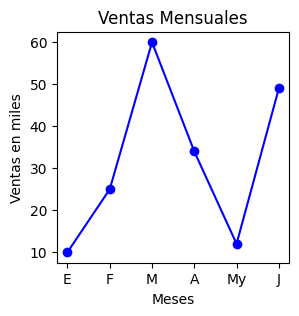

In [ ]:
#GRAFICO DE LINEAS
month = np.array (['E', 'F', 'M', 'A', 'My', 'J'])    #paso 1: definir la informacion
sales = np.array ([10, 25, 60, 34, 12, 49])

#configurar el tamaño del gráfico
plt.figure(figsize=(3, 3))                           #paso 2: configurar el tamaño

#crear el gráfico
plt.plot(month, sales, marker='o', color='blue')      #paso 3: definir el tipo de gráfico
plt.title('Ventas Mensuales') #titulo                 #paso 4: definir titulo y etiquetas en 'X' y 'Y'
plt.xlabel('Meses') #etiquetas
plt.ylabel('Ventas en miles')

#mostrar el gráfico
plt.show()                                             #paso 5: mostrar el gráfico

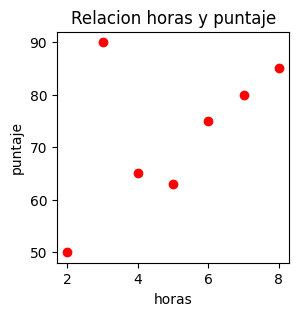

In [ ]:
#grafico de dispersión

import matplotlib.pyplot as plt

#configurar el tamaño del gráfico
plt.figure(figsize=(3, 3))

hours = [2,3,4,5,6,7,8]
exam = [50,90,65,63,75,80,85]

plt.scatter(hours, exam, color='red', marker='o')
plt.title('Relacion horas y puntaje') #titulo
plt.xlabel('horas') #etiquetas
plt.ylabel('puntaje')

plt.show()

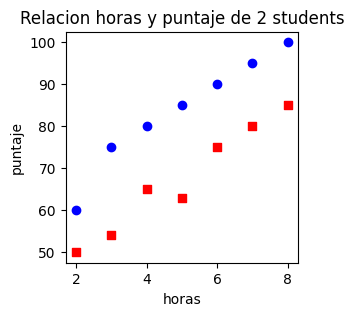

In [ ]:
#personalización de gráficos
#colores, ancho, tendencias, etc

import matplotlib.pyplot as plt

#configurar el tamaño del gráfico
plt.figure(figsize=(3, 3))

hours = [2,3,4,5,6,7,8]
exam_scores_student_1 = [50,54,65,63,75,80,85]
exam_scores_student_2 = [60,75,80,85,90,95,100]

#grafico de dispersion de 2 student
plt.scatter(hours, exam_scores_student_1, color='red', marker='s', label='Student 1')
plt.scatter(hours, exam_scores_student_2, color='blue', marker='o', label='Student 2')


plt.title('Relacion horas y puntaje de 2 students') #titulo
plt.xlabel('horas') #etiquetas
plt.ylabel('puntaje')

plt.show()

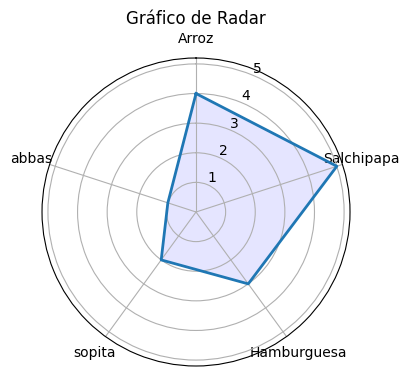

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Definir etiquetas y datos
categories = ['Arroz', 'Salchipapa', 'Hamburguesa', 'sopita', 'abbas']
values = [4, 5, 3, 2, 1]

# Crear ángulos para las categorías
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Para cerrar el gráfico

# Crear el gráfico
fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Dibujar los datos
values += values[:1]  # Cerrar el gráfico
ax.plot(angles, values, linewidth=2, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)

# Añadir etiquetas
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

plt.title('Gráfico de Radar')
plt.show()



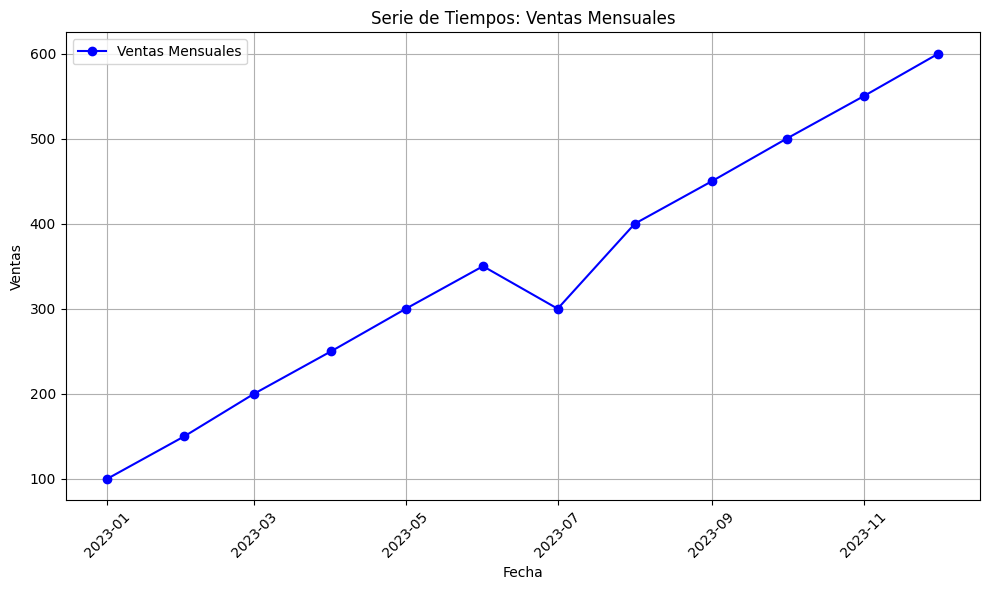

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame con fechas y ventas mensuales
data = {
    'Fecha': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
              '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
              '2023-11-01', '2023-12-01'],
    'Ventas': [100, 150, 200, 250, 300, 350, 300, 400, 450, 500, 550, 600]
}

# Convertimos las fechas a un formato de datetime y creamos el DataFrame
df = pd.DataFrame(data)
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Configuración de la gráfica
plt.figure(figsize=(10, 6))
plt.plot(df['Fecha'], df['Ventas'], marker='o', linestyle='-', color='b', label='Ventas Mensuales')

# Añadimos etiquetas y título
plt.title('Serie de Tiempos: Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.xticks(rotation=45)  # Rotación de las etiquetas del eje X para mejorar la legibilidad
plt.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()


<Axes: xlabel='Date'>

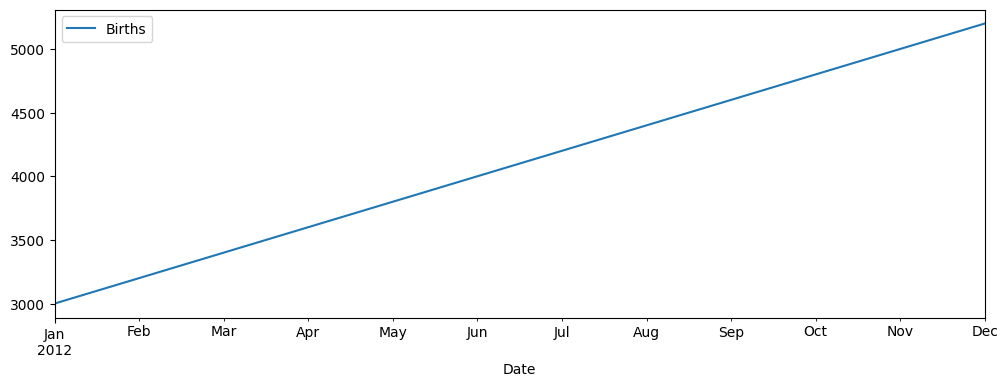

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Create a sample DataFrame (Replace with your actual birth data)
# Assuming you have birth data in a CSV file, you can load it like this:
# dataFrameBirths = pd.read_csv('your_birth_data.csv')

# For demonstration, I'll create a sample DataFrame:
dataFrameBirths = pd.DataFrame({
    'Date': pd.to_datetime(['2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01']),
    'Births': [3000, 3200, 3400, 3600, 3800, 4000, 4200, 4400, 4600, 4800, 5000, 5200]
})
dataFrameBirths.set_index('Date', inplace=True)  # Set 'Date' column as index

# 2. Create the plot
fig, ax = plt.subplots(figsize=(12, 4))
dataFrameBirths.plot(ax=ax)

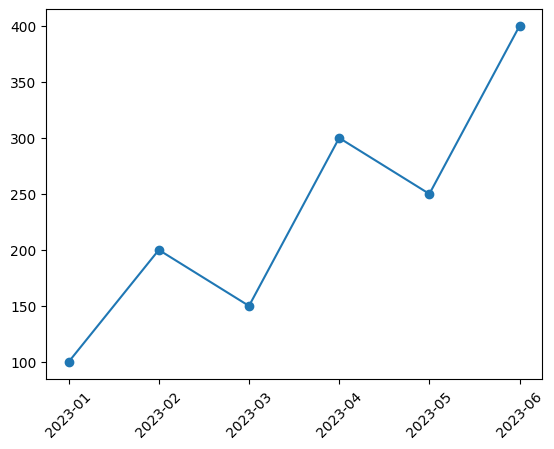

In [ ]:
import matplotlib.pyplot as plt

# Simulación de datos
x = ['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06']
y = [100, 200, 150, 300, 250, 400]

# Crear gráfico
plt.plot(x, y, marker='o')

# Personalizar etiquetas en el eje X
plt.xticks(rotation=45, fontsize=10)

# Mostrar gráfico
plt.show()


# **GRAFICOS AVANZADOS**

In [ ]:
#GRIDSPEC
#SUPLOT Y LAYOUT AVANZADOS

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

#crear 3 graficos diferentes
x = np.linspace(0, 10, 100) #linspace da: arreglo de numeros espaciados
y = np.sin(x)

data = np.random.rand(100) #crea un arreglo de 100 datos

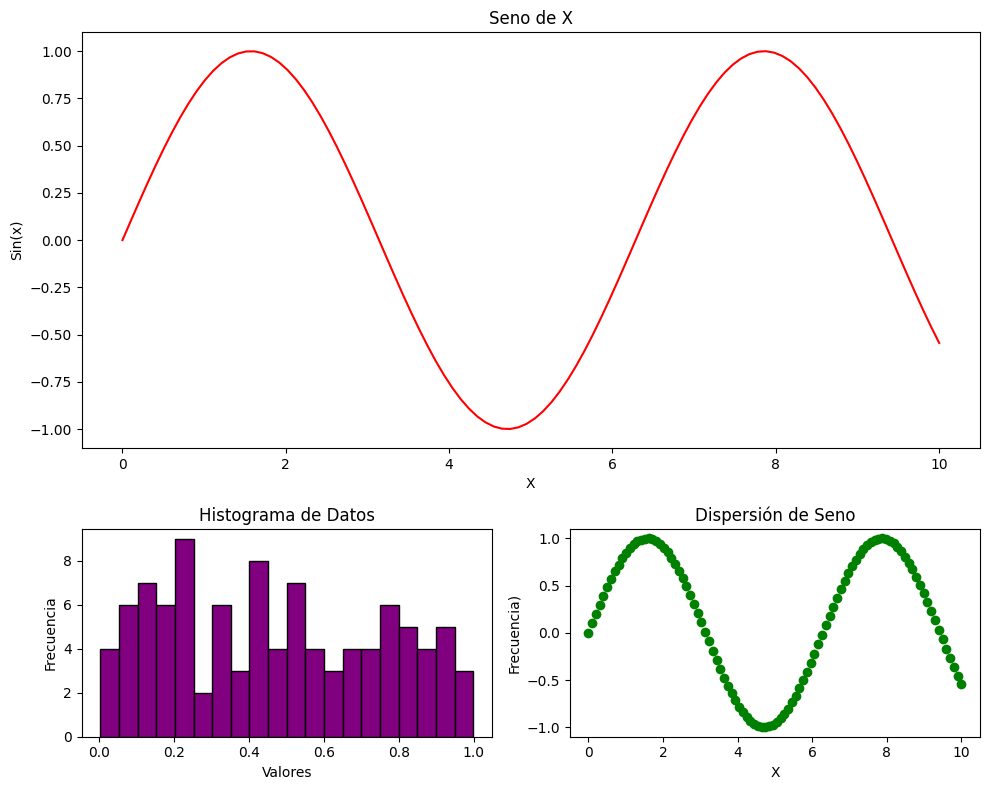

In [ ]:
#crear una grilla o cuadricula para inscrustrar

gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[2,1])

#personalizacion
fig = plt.figure(figsize=(10, 8)) #tamaño

#incrustrar los gráficos creados, de manera especifica

# Primer suplot grande, ocupa la primera fila

ax1= fig.add_subplot(gs[0, :])
ax1.plot(x,y, color='red')
ax1.set_title('Seno de X')
ax1.set_xlabel('X')
ax1.set_ylabel('Sin(x)') #seno de x

# Segundo suplot, ocupa la esquina inferior izquierda

ax2 = fig.add_subplot(gs[1, 0])
ax2.hist(data, bins = 20, color='purple', edgecolor='black')
ax2.set_title('Histograma de Datos')
ax2.set_xlabel('Valores')
ax2.set_ylabel('Frecuencia')

# Tercer suplor, ubicado esquina inferior derecha

ax3 = fig.add_subplot(gs[1, 1])
ax3.scatter(x, y, color='green', marker='o')
ax3.set_title('Dispersión de Seno')
ax3.set_xlabel('X')
ax3.set_ylabel('Frecuencia)')

#ajustar el layout para evitar la superposición

plt.tight_layout()
plt.show()